In [5]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange
from scipy.interpolate import CubicSpline
import sympy as sp
sp.init_printing()
import math as mt
import pandas as pd
import urllib.request

# Actividad 04: Interpolación

---
### Profesor: Juan Marcos Marín
### Nombre: ______
*Métodos computacionales 2024-II*

---

# 1a
Supongamos que queremos interpolar la función  $f(x)=\sin(x)$  usando los puntos  $x_0=0$ ,  $x_1=\pi/2$ , y  $x_2=\pi$.

Encuentre el polinomio de interpolación de Lagrange y el error asociado al misma. Recuerde que el error de interpolación de Lagrange puede expresarse explícitamente como:

\begin{equation}
f(x) - P(x) = \epsilon = \frac{1}{(n+1)!} f^{(n+1)}(\xi)(x - x_0)(x - x_1) ... (x - x_n)
\end{equation},
Donde:
- $f^{(n+1)}(\xi)$ es la derivada de orden $n$ de la función $f(x)$ evaluada en algún punto $\xi$ en el intervalo de interpolación.



In [12]:
x = sp.symbols('x')

puntos = [(0,np.sin(0)), (np.pi/2,np.sin(np.pi/2)), (np.pi,np.sin(np.pi))]

x_vals = [p[0] for p in puntos]
y_vals = [p[1] for p in puntos]

polinomios_lagrange = []

for i in range(len(puntos)):
    L_i = 1
    for j in range(len(puntos)):
        if i != j:
            L_i *= (x - x_vals[j]) / (x_vals[i] - x_vals[j])

    polinomios_lagrange.append(L_i)

for i in range(len(puntos)):
  print(f'L_{i}(x)')
  display(sp.expand(polinomios_lagrange[i]))
  print(5*'----')

polinomio_final = sum(L_i * y_vals[i] for i, L_i in enumerate(polinomios_lagrange))
polinomio_final = sp.simplify(polinomio_final)

P = sp.lambdify(x, polinomio_final)
display(P(2.5))
display(polinomio_final)

f_3 = sp.lambdify(x, -sp.cos(x))

f_3_max = 1

x_eval = 2.5
producto = np.prod([(x_eval - xi) for xi in x_vals])

error = abs(f_3_max * producto / 6)

print(f"Error estimado en x = 2.5: {error}")

L_0(x)


                   2                            
0.202642367284676⋅x  - 0.954929658551372⋅x + 1.0

--------------------
L_1(x)


                     2                     
- 0.405284734569351⋅x  + 1.27323954473516⋅x

--------------------
L_2(x)


                   2                      
0.202642367284676⋅x  - 0.318309886183791⋅x

--------------------


0.6500692707794564

x⋅(1.27323954473516 - 0.405284734569351⋅x)

Error estimado en x = 2.5: 0.2484042710071022


# 1b
Repita el numeral anterior, pero para los polinomios de interpolación de Hermite, conociendo que:


$$
f(x) - P(x) = \epsilon = \frac{f^{(2n+2)}(\xi)}{(2n+2)!} \prod_{i=0}^{n} (x - x_i)^2
$$

In [15]:
x_vals = np.array([p[0] for p in puntos])
y_vals = np.array([p[1] for p in puntos])

def hermite_interpolation(x_vals, y_vals, derivatives):
    x = sp.symbols('x')
    n = len(x_vals)
    H = 0

    for i in range(n):
        h_i = 1
        for j in range(n):
            if j != i:
                h_i *= (x - x_vals[j]) / (x_vals[i] - x_vals[j])

        h_i_prime = sp.diff(h_i, x).subs(x, x_vals[i])

        term1 = (h_i**2) * (1 - 2 * (x - x_vals[i]) * h_i_prime) * y_vals[i]
        term2 = (h_i**2) * (x - x_vals[i]) * derivatives[i]

        H += term1 + term2

    return sp.simplify(H)

derivadas = np.cos(x_vals)

H_x = hermite_interpolation(x_vals, y_vals, derivadas)

H_func = sp.lambdify(sp.symbols('x'), H_x, 'numpy')

f_real = lambda x: np.sin(x)

error_vals = np.abs(f_real(x_vals) - H_func(x_vals))

print("Polinomio de Hermite:", H_x)
print("Errores absolutos en los puntos de interpolación:", error_vals)

Polinomio de Hermite: x*(0.0352495783421514*x**3 - 0.221479632723681*x**2 + 0.0295895073584512*x + 1.0)
Errores absolutos en los puntos de interpolación: [0.00000000e+00 2.22044605e-15 1.55729436e-14]


# 2

En física nuclear se calcula la sección eficaz de dispersión (scattering cross section) a partir de experimentos de colisiones, se sabe a partir de la teoría que la sección eficaz se describe por la formula de Breit-Wigner,

$$\sigma(E)=\frac{\sigma_0}{(E-E_r)^2+\frac{\Gamma^2}{4}}$$

donde $E$ es la energía y $E_r,\sigma_0, \Gamma$ son parámetros a ajustar; el valor predicho es $(E_r,\Gamma) = (78, 55)$ MeV; donde $\sigma_0$ se puede calcular ahora a partir de la fórmula simplemente remplazando cualquier par de puntos de la tabla.

A partir de los valores de energía,


```
Energia  = np.array([0   , 25  , 50  , 75  , 100 , 125 , 150 , 175 , 200])
sigma_exp= np.array([10.6, 16.0, 45.0, 83.5, 52.8, 19.9, 10.8, 8.25, 4.7])

```

* Calcule los polinomios de Lagrange, Newton y Hermite.

* Haga un gráfico de los polinomios junto con la función.

* Finalmente, a partir de la diferencia $|f(x) - P_n(x)|$ calcule el error asociado a cada uno de ellos. ¿Cuál será el mejor?

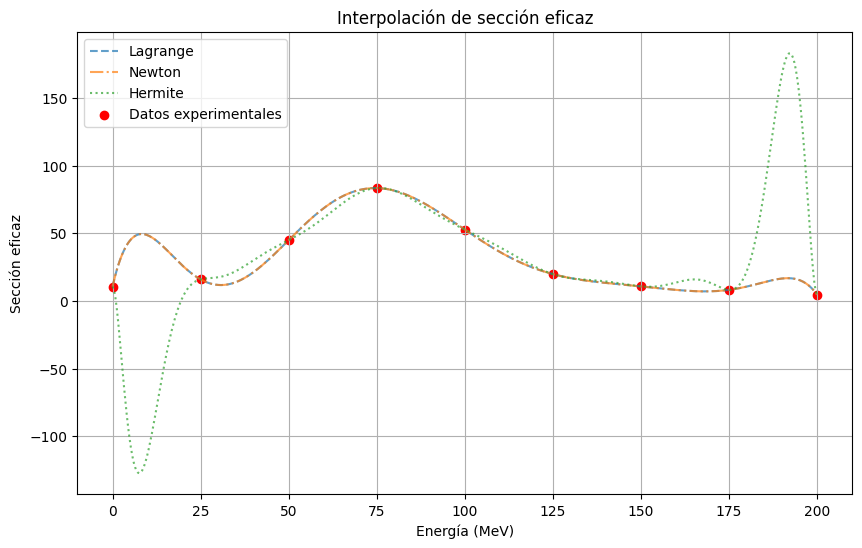

Error total Lagrange: 1.307363994840216e-09
Error total Newton: 3.2741906963451584e-09
Error total Hermite: 853416842874.0154


In [18]:
def lagrange_interpolation(x_vals, y_vals):
    x = sp.Symbol('x')
    n = len(x_vals)
    P = 0

    for i in range(n):
        L_i = 1
        for j in range(n):
            if i != j:
                L_i *= (x - x_vals[j]) / (x_vals[i] - x_vals[j])
        P += L_i * y_vals[i]

    return sp.simplify(P)

def diferencias_divididas(x, y):
    n = len(x)
    coef = y
    tabla = np.zeros((n, n))
    tabla[:,0] = y

    for j in range(1, n):
        for i in range(n-j):
            tabla[i,j] = (tabla[i+1,j-1] - tabla[i,j-1]) / (x[i+j] - x[i])

    coef = tabla[0,:]
    return tabla, coef
def newton_interpolation(x_vals, y_vals):
    x = sp.Symbol('x')
    _, coef = diferencias_divididas(x_vals, y_vals)
    n = len(x_vals)

    P = coef[0]
    producto = 1

    for i in range(1, n):
        producto *= (x - x_vals[i - 1])
        P += coef[i] * producto

    return sp.simplify(P)

def hermite_interpolation(x_vals, y_vals, derivatives):
    x = sp.Symbol('x')
    n = len(x_vals)
    H = 0

    for i in range(n):
        h_i = 1
        for j in range(n):
            if j != i:
                h_i *= (x - x_vals[j]) / (x_vals[i] - x_vals[j])

        h_i_prime = sp.diff(h_i, x).subs(x, x_vals[i])
        term1 = (h_i**2) * (1 - 2 * (x - x_vals[i]) * h_i_prime) * y_vals[i]
        term2 = (h_i**2) * (x - x_vals[i]) * derivatives[i]

        H += term1 + term2

    return sp.simplify(H)

energia = np.array([0, 25, 50, 75, 100, 125, 150, 175, 200])
sigma_exp = np.array([10.6, 16.0, 45.0, 83.5, 52.8, 19.9, 10.8, 8.25, 4.7])

derivadas = np.gradient(sigma_exp, energia)

P_lagrange = lagrange_interpolation(energia, sigma_exp)
P_newton = newton_interpolation(energia, sigma_exp)
P_hermite = hermite_interpolation(energia, sigma_exp, derivadas)

P_lagrange_func = sp.lambdify(sp.Symbol('x'), P_lagrange)
P_newton_func = sp.lambdify(sp.Symbol('x'), P_newton)
P_hermite_func = sp.lambdify(sp.Symbol('x'), P_hermite)

energia_fina = np.linspace(0, 200, 500)
lagrange_vals = P_lagrange_func(energia_fina)
newton_vals = P_newton_func(energia_fina)
hermite_vals = P_hermite_func(energia_fina)

plt.figure(figsize=(10, 6))
plt.plot(energia_fina, lagrange_vals, '--', label='Lagrange', alpha=0.7)
plt.plot(energia_fina, newton_vals, '-.', label='Newton', alpha=0.7)
plt.plot(energia_fina, hermite_vals, ':', label='Hermite', alpha=0.7)
plt.scatter(energia, sigma_exp, color='red', label='Datos experimentales')
plt.xlabel('Energía (MeV)')
plt.ylabel('Sección eficaz')
plt.legend()
plt.grid()
plt.title('Interpolación de sección eficaz')
plt.show()

error_lagrange = np.abs(sigma_exp - P_lagrange_func(energia))
error_newton = np.abs(sigma_exp - P_newton_func(energia))
error_hermite = np.abs(sigma_exp - P_hermite_func(energia))

print(f'Error total Lagrange: {np.sum(error_lagrange)}')
print(f'Error total Newton: {np.sum(error_newton)}')
print(f'Error total Hermite: {np.sum(error_hermite)}')


#3
Consideremos la función:
\begin{equation*}
     f(x) = \frac{1}{1+25x^2}
\end{equation*}
en el intervalo $[-1, 1]$, definamos un conjunto de puntos $n+1$  equiespaciados en $[-1,1]$.

* Representar gráficamente la función junto al polinomio de interpolación de Lagrange, $p_n(x)$, para $n=\{ 4, 8, 12, 16, 20 \}$.
* Comprobar gráficamente cómo el error aumenta con $n$. Emplee la libreria, simbolica de `sympy` y encuente el error en la interpolación. La cota del  error , viene dado por:
\begin{equation}
f(x) - P(x) = \epsilon = \frac{1}{(n+1)!} f^{(n+1)}(\xi)(x - x_0)(x - x_1) ... (x - x_n)
\end{equation},

emplee la libreria simbólica para realizar la estimación de dicha cuota, sólo para $n = 4$, en el punto $x=0.5$.

* Repita la parte inicial para el conjunto de $p_n(x)$ con $n=\{ 4, 8, 12, 16, 20 \}$, usando la interpolación de Hermite, ¿existe alguna diferencia?

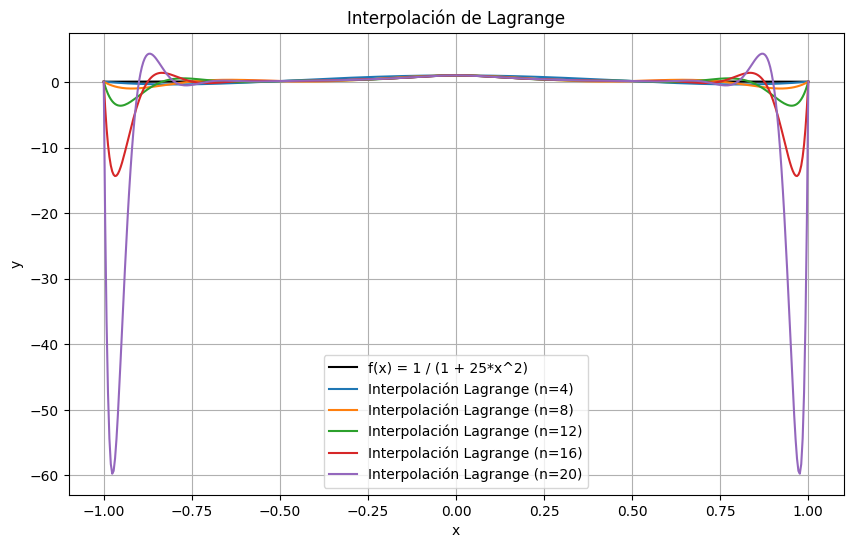

Error real en x=0.5 para n=4: 6.106226635438361e-16
Cota del error en x=0.5 para n=4: 0


In [20]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

# Definir la función original
def f(x):
    return 1 / (1 + 25 * x**2)

# Intervalo y valores de n
intervalo = [-1, 1]
n_values = [4, 8, 12, 16, 20]

# Puntos para la gráfica
x_fine = np.linspace(intervalo[0], intervalo[1], 500)
y_fine = f(x_fine)

plt.figure(figsize=(10, 6))
plt.plot(x_fine, y_fine, 'k-', label='f(x) = 1 / (1 + 25*x^2)')

for n in n_values:
    x_vals = np.linspace(intervalo[0], intervalo[1], n+1)
    y_vals = f(x_vals)

    Pn = lagrange_interpolation(x_vals, y_vals)
    Pn_func = sp.lambdify(sp.Symbol('x'), Pn)
    y_interp = Pn_func(x_fine)

    plt.plot(x_fine, y_interp, label=f'Interpolación Lagrange (n={n})')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Interpolación de Lagrange')
plt.legend()
plt.grid()
plt.show()


x_error = 0.5
n_error = 4
x_vals_error = np.linspace(intervalo[0], intervalo[1], n_error+1)
y_vals_error = f(x_vals_error)

Pn_error = lagrange_interpolation(x_vals_error, y_vals_error)
Pn_func_error = sp.lambdify(sp.Symbol('x'), Pn_error)

error_interpolacion = abs(f(x_error) - Pn_func_error(x_error))

x_sym = sp.Symbol('x')
f_sym = 1 / (1 + 25 * x_sym**2)

f_derivada = sp.diff(f_sym, x_sym, n_error+1)


xi = sp.Symbol('xi')
max_f_deriv = sp.lambdify(x_sym, abs(f_derivada))
max_f_value = max(max_f_deriv(x_fine))


prod_term = np.prod([(x_error - x_vals_error[i]) for i in range(n_error+1)])
error_cota = (1 / sp.factorial(n_error+1)) * max_f_value * abs(prod_term)

print(f'Error real en x=0.5 para n=4: {error_interpolacion}')
print(f'Cota del error en x=0.5 para n=4: {error_cota}')


# 4

Consideremos la imagen ![paloma](https://github.com/hernansalinas/autogrades/blob/main/Laboratorios_Taller/img/paloma.png?raw=true).

Ref: Metodos numericos, Burden.


Con los datos dados en la tabla:

1. Representar gráficamente la imagen, usando las órdenes `imread` e `imshow` de python (estas órdenes están contenidas en el paquete `matplotlib`)

2. Definir una lista de puntos, $x_i$,$y_i$ del pato.

3. Representar el polinomio de interpolación de Lagrange y de Hermite en estos puntos, para aproximar el dibujo.

4. Repetir el proceso de interpolación mediante *splines* cúbicos. Para ello, utilizar la función `CubicSpline` (contenida en `scipy.interpolate`),


5. Comparar los resultados. ¿Alguna de las interpolaciones presenta oscilaciones? ¿A qué se debe este fenómeno?



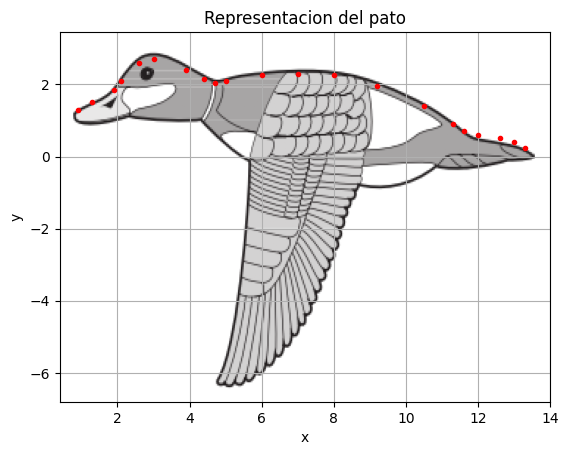

In [ ]:
pato = 'https://3.bp.blogspot.com/-8_LTrCIxVSQ/VxU-5Gq2ffI/AAAAAAAAIto/LhCDEwHKTiAbLr7IhizQwGV13YTwgpbDwCLcB/s400/pato1.png' #URL
urllib.request.urlretrieve(pato, 'pato.jpg')# Decargar la imagen
imagen_pato = plt.imread('pato.jpg') # Variable con la imagen del pato

# Definimos los puntos del pato
xp = [0.9, 1.3, 1.9, 2.1, 2.6, 3.0, 3.9, 4.4, 4.7, 5.0, 6.0, 7.0, 8.0, 9.2, 10.5, 11.3, 11.6, 12.0, 12.6, 13.0, 13.3]
yp = [1.3, 1.5, 1.85, 2.1, 2.6, 2.7, 2.4, 2.15, 2.05, 2.1, 2.25, 2.3, 2.25, 1.95, 1.4, 0.9, 0.7, 0.6, 0.5, 0.4, 0.25]

# Representamos graficamente al pato y los puntos que definimos para su contorno superior
plt.figure()
plt.title('Representacion del pato')
plt.imshow(imagen_pato, extent = (0.4, 14, -6.8, 3.45)) # Ajustamos los pixeles para que coinsidan con x y y
plt.plot(xp, yp, '.r')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()